# Applying OneR to UCI ML Repository Adult&Cancer dataset Analysis
### 2018-1학기 고려대학교 김현철 교수님 인공지능 기말과제
#### 2018.06.10 2013130625 조성표

In [70]:
library(OneR)

## 1. Wisconsin Breast Cancer Dataset Analysis
R에 구현된 OneR 라이브러리를 사용하여 Wisconsin 유방암 데이터와 Adult 데이터를 분석했습니다.

OneR 라이브러리 주소(by Holger K. von Jouanne-Diedrich): https://github.com/vonjd/OneR

In [59]:
# Load and name data
data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                header = FALSE)
data <- data[-1] #remove sample code number
names(data) <- c('diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
              'radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 
              'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius',
              'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 
              'worst concave points', 'worst symmetry', 'worst fractal dimension')
head(data)

diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [60]:
# moveme func: from 'https://stackoverflow.com/questions/3369959/moving-columns-within-a-data-frame-without-retyping/18540144'
moveme <- function (invec, movecommand) {
  movecommand <- lapply(strsplit(strsplit(movecommand, ";")[[1]], 
                                 ",|\\s+"), function(x) x[x != ""])
  movelist <- lapply(movecommand, function(x) {
    Where <- x[which(x %in% c("before", "after", "first", 
                              "last")):length(x)]
    ToMove <- setdiff(x, Where)
    list(ToMove, Where)
  })
  myVec <- invec
  for (i in seq_along(movelist)) {
    temp <- setdiff(myVec, movelist[[i]][[1]])
    A <- movelist[[i]][[2]][1]
    if (A %in% c("before", "after")) {
      ba <- movelist[[i]][[2]][2]
      if (A == "before") {
        after <- match(ba, temp) - 1
      }
      else if (A == "after") {
        after <- match(ba, temp)
      }
    }
    else if (A == "first") {
      after <- 0
    }
    else if (A == "last") {
      after <- length(myVec)
    }
    myVec <- append(temp, values = movelist[[i]][[1]], after = after)
  }
  myVec
}

In [62]:
data <- data[moveme(names(data), "diagnosis last")]
head(data)

mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M


In [64]:
# Divide training (80%) and test set (20%)
set.seed(123)
random <- sample(1:nrow(data), 0.8 * nrow(data))
data.train <- optbin(data[random, ])
data.test <- data[-random, ]

head(data.train)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
164,"(6.96,14.8]","(21.5,39.3]","(43.6,95.8]","(141,679]","(0.0525,0.103]","(0.0262,0.121]","(-0.000427,0.103]","(-0.000201,0.0544]","(0.106,0.193]","(0.0622,0.0975]",...,"(12,29.1]","(50.2,110]","(181,856]","(0.144,0.223]","(0.0424,0.297]","(-0.00125,0.329]","(-0.000291,0.134]","(0.156,0.32]","(0.0902,0.173]",B
448,"(6.96,14.8]","(9.68,21.5]","(95.8,189]","(141,679]","(0.0525,0.103]","(0.0262,0.121]","(-0.000427,0.103]","(-0.000201,0.0544]","(0.106,0.193]","(0.0499,0.0622]",...,"(12,29.1]","(50.2,110]","(181,856]","(0.0847,0.144]","(0.0424,0.297]","(-0.00125,0.329]","(-0.000291,0.134]","(0.32,0.664]","(0.0551,0.0902]",B
232,"(6.96,14.8]","(21.5,39.3]","(43.6,95.8]","(141,679]","(0.0525,0.103]","(0.0262,0.121]","(-0.000427,0.103]","(-0.000201,0.0544]","(0.106,0.193]","(0.0499,0.0622]",...,"(29.1,47.2]","(50.2,110]","(181,856]","(0.0847,0.144]","(0.0424,0.297]","(-0.00125,0.329]","(-0.000291,0.134]","(0.156,0.32]","(0.0551,0.0902]",B
500,"(14.8,28.1]","(9.68,21.5]","(95.8,189]","(679,2.5e+03]","(0.103,0.164]","(0.121,0.346]","(0.103,0.427]","(0.0544,0.201]","(0.106,0.193]","(0.0622,0.0975]",...,"(29.1,47.2]","(110,251]","(856,4.26e+03]","(0.144,0.223]","(0.297,0.939]","(0.329,1.25]","(0.134,0.291]","(0.156,0.32]","(0.0551,0.0902]",M
532,"(6.96,14.8]","(9.68,21.5]","(43.6,95.8]","(141,679]","(0.0525,0.103]","(0.0262,0.121]","(-0.000427,0.103]","(-0.000201,0.0544]","(0.106,0.193]","(0.0622,0.0975]",...,"(12,29.1]","(50.2,110]","(181,856]","(0.144,0.223]","(0.0424,0.297]","(-0.00125,0.329]","(-0.000291,0.134]","(0.32,0.664]","(0.0551,0.0902]",B
26,"(14.8,28.1]","(9.68,21.5]","(95.8,189]","(679,2.5e+03]","(0.103,0.164]","(0.121,0.346]","(0.103,0.427]","(0.0544,0.201]","(0.193,0.304]","(0.0622,0.0975]",...,"(12,29.1]","(110,251]","(856,4.26e+03]","(0.144,0.223]","(0.297,0.939]","(0.329,1.25]","(0.134,0.291]","(0.32,0.664]","(0.0902,0.173]",M


In [65]:
# Train OneR model on training set
model.train <- OneR(data.train, verbose = T)


    Attribute               Accuracy
1 * worst perimeter         92.09%  
2   worst concave points    91.87%  
3   worst radius            91.21%  
4   worst area              90.77%  
5   mean concave points     90.33%  
6   mean perimeter          87.91%  
6   mean area               87.91%  
8   mean radius             87.69%  
8   mean concavity          87.69%  
10  area error              87.25%  
11  worst concavity         85.05%  
12  radius error            82.86%  
13  perimeter error         81.54%  
14  worst compactness       80%     
15  mean compactness        79.34%  
16  worst symmetry          72.31%  
17  worst smoothness        71.65%  
18  worst texture           71.43%  
19  concave points error    70.99%  
20  mean texture            70.33%  
21  concavity error         68.57%  
22  worst fractal dimension 68.35%  
23  mean smoothness         67.03%  
24  compactness error       66.37%  
25  mean symmetry           65.27%  
26  mean fractal dimension  62.64%  


In [66]:
# Show model and diagnostics
summary(model.train)


Call:
OneR.data.frame(x = data.train, verbose = T)

Rules:
If worst perimeter = (50.2,110] then diagnosis = B
If worst perimeter = (110,251]  then diagnosis = M

Accuracy:
419 of 455 instances classified correctly (92.09%)

Contingency table:
         worst perimeter
diagnosis (50.2,110] (110,251] Sum
      B        * 271        14 285
      M           22     * 148 170
      Sum        293       162 455
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 309.83, df = 1, p-value < 2.2e-16



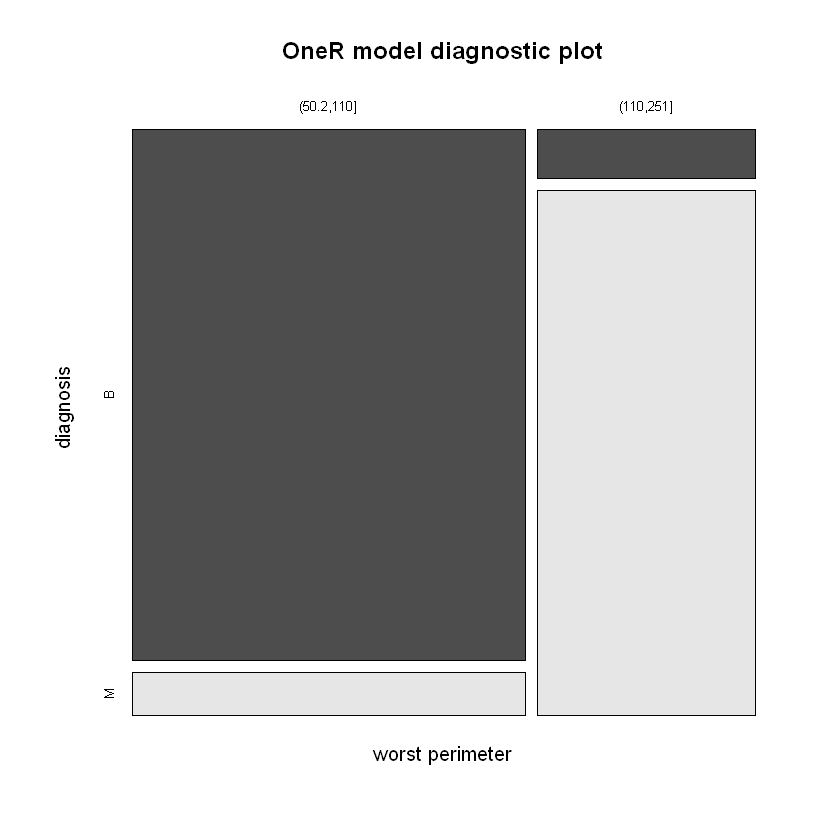

In [67]:
# Plot model diagnostics
plot(model.train)

In [68]:
# Use trained model to predict test set
prediction <- predict(model.train, data.test)
# Evaluate model performance on test set
eval_model(prediction, data.test)


Confusion matrix (absolute):
          Actual
Prediction   B   M Sum
       B    68   6  74
       M     4  36  40
       Sum  72  42 114

Confusion matrix (relative):
          Actual
Prediction    B    M  Sum
       B   0.60 0.05 0.65
       M   0.04 0.32 0.35
       Sum 0.63 0.37 1.00

Accuracy:
0.9123 (104/114)

Error rate:
0.0877 (10/114)

Error rate reduction (vs. base rate):
0.7619 (p-value = 6.554e-12)



## 2. UCI Adult Dataset Analysis

In [91]:
df <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = FALSE)
colnames(df) <- c("Age", "Work_Class", "Sampling_Weight", "Highest_Education", "Education_Num", 
                  "Martial_Status", "Occupation", "Relationship", "Race", "Sex", "Cap_Gain", "Cap_Loss",
                  "Hours_Per_Week", "Native_Country", "Income")

In [93]:
head(df)

Age,Work_Class,Sampling_Weight,Highest_Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Cap_Gain,Cap_Loss,Hours_Per_Week,Native_Country,Income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [94]:
# Divide training (80%) and test set (20%)
set.seed(123)
random <- sample(1:nrow(df), 0.8 * nrow(df))
df.train <- optbin(df[random, ])
df.test <- df[-random, ]

head(df.train)

,Age,Work_Class,Sampling_Weight,Highest_Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Cap_Gain,Cap_Loss,Hours_Per_Week,Native_Country,Income
9364,"(16.9,44.3]",Private,"(1.87e+05,1.49e+06]",HS-grad,"(0.985,11.6]",Married-civ-spouse,Other-service,Husband,White,Male,"(-100,3.97e+03]","(-4.36,193]","(0.902,45.5]",United-States,<=50K
25668,"(16.9,44.3]",Private,"(1.08e+04,1.87e+05]",HS-grad,"(0.985,11.6]",Married-civ-spouse,Craft-repair,Husband,White,Male,"(-100,3.97e+03]","(-4.36,193]","(45.5,99.1]",United-States,<=50K
13316,"(16.9,44.3]",Private,"(1.08e+04,1.87e+05]",HS-grad,"(0.985,11.6]",Never-married,Exec-managerial,Own-child,Other,Female,"(-100,3.97e+03]","(-4.36,193]","(0.902,45.5]",Mexico,<=50K
28750,"(44.3,90.1]",Self-emp-not-inc,"(1.08e+04,1.87e+05]",5th-6th,"(0.985,11.6]",Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,"(-100,3.97e+03]","(-4.36,193]","(0.902,45.5]",United-States,<=50K
30619,"(16.9,44.3]",Private,"(1.87e+05,1.49e+06]",HS-grad,"(0.985,11.6]",Never-married,Other-service,Not-in-family,White,Female,"(-100,3.97e+03]","(-4.36,193]","(0.902,45.5]",United-States,<=50K
1484,"(16.9,44.3]",Private,"(1.87e+05,1.49e+06]",HS-grad,"(0.985,11.6]",Never-married,Craft-repair,Not-in-family,White,Male,"(-100,3.97e+03]","(-4.36,193]","(0.902,45.5]",United-States,<=50K


In [95]:
# Train OneR model on training set
model.train <- OneR(df.train, verbose = T)

Warning message in OneR.data.frame(df.train, verbose = T):
"data contains unused factor levels"


    Attribute         Accuracy
1 * Cap_Gain          79.91%  
2   Highest_Education 78.02%  
3   Work_Class        76.19%  
4   Cap_Loss          75.91%  
5   Age               75.84%  
5   Sampling_Weight   75.84%  
5   Education_Num     75.84%  
5   Martial_Status    75.84%  
5   Occupation        75.84%  
5   Relationship      75.84%  
5   Race              75.84%  
5   Sex               75.84%  
5   Hours_Per_Week    75.84%  
5   Native_Country    75.84%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



In [96]:
# Show model and diagnostics
summary(model.train)


Call:
OneR.data.frame(x = df.train, verbose = T)

Rules:
If Cap_Gain = (-100,3.97e+03]  then Income =  <=50K
If Cap_Gain = (3.97e+03,1e+05] then Income =  >50K

Accuracy:
20815 of 26048 instances classified correctly (79.91%)

Contingency table:
        Cap_Gain
Income   (-100,3.97e+03] (3.97e+03,1e+05]   Sum
   <=50K         * 19522              233 19755
   >50K             5000           * 1293  6293
  Sum              24522             1526 26048
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 3242.4, df = 1, p-value < 2.2e-16



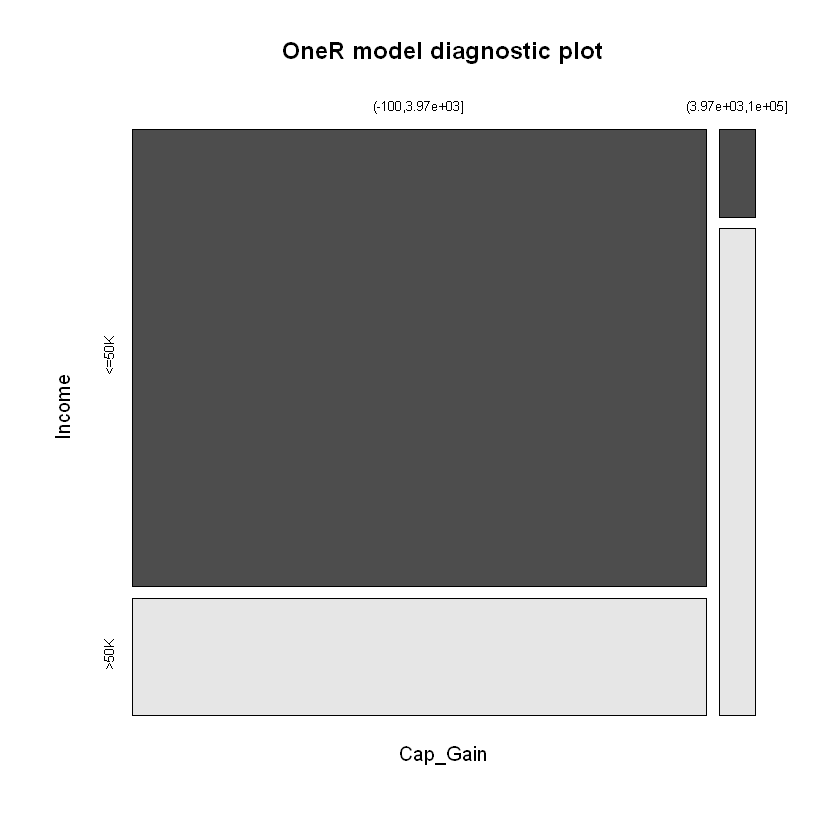

In [97]:
# Plot model diagnostics
plot(model.train)

In [99]:
# Use trained model to predict test set
prediction <- predict(model.train, df.test)
# Evaluate model performance on test set
eval_model(prediction, df.test)


Confusion matrix (absolute):
          Actual
Prediction  <=50K  >50K  Sum
     <=50K   4889  1254 6143
     >50K      76   294  370
    Sum      4965  1548 6513

Confusion matrix (relative):
          Actual
Prediction  <=50K  >50K  Sum
     <=50K   0.75  0.19 0.94
     >50K    0.01  0.05 0.06
    Sum      0.76  0.24 1.00

Accuracy:
0.7958 (5183/6513)

Error rate:
0.2042 (1330/6513)

Error rate reduction (vs. base rate):
0.1408 (p-value = 6.021e-11)

